<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_6_Soft_Clustering_and_Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 6: Soft Clustering and Gaussian Mixture Models
# Install Required Libraries
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.4 MB/s eta 0:00:00


In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [28]:
# Uploading the Bank Marketing Dataset
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [25]:
# Unzipping the uploaded Dataset
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
replace bank.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: bank.zip                
replace bank-additional.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: bank-additional.zip     


In [29]:
# Loading the Dataset
df = pd.read_csv("bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
# Basic Preprocessing
numerical_df = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_df)

In [31]:
# Dimensionality Reduction: PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [32]:
# Fuzzy C-Means Clustering
# Fuzzy C-Means Implementation
import skfuzzy as fuzz

X_fcm = X_pca.T  # FCM expects transposed data

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_fcm,
    c=3,
    m=2,
    error=0.005,
    maxiter=1000
)

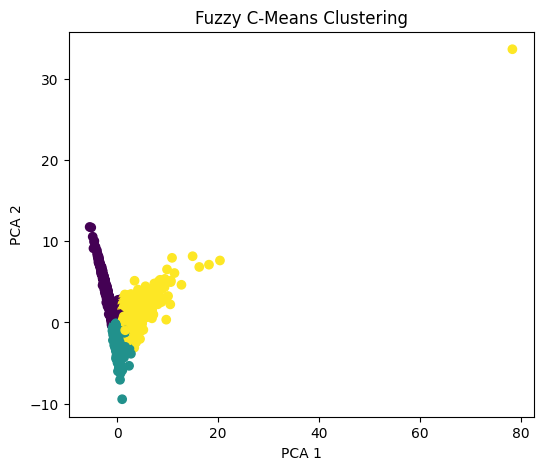

In [33]:
# Fuzzy C-Means Visualization
labels_fcm = np.argmax(u, axis=0)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_fcm)
plt.title("Fuzzy C-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [34]:
# Membership Values Discussion
u[:5]

"""Explanation: -

each row shows a cluster

Each column shows membership strength

Example like: [0.2, 0.7, 0.1] -> data point mostly belongs to cluster 2"""

'Explanation: -\n\neach row shows a cluster\n\nEach column shows membership strength\n\nExample like: [0.2, 0.7, 0.1] -> data point mostly belongs to cluster 2'

In [35]:
# Gaussian Mixture Models (GMM)
# GMM Implementation
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)

labels_gmm = gmm.predict(X_pca)
probs = gmm.predict_proba(X_pca)

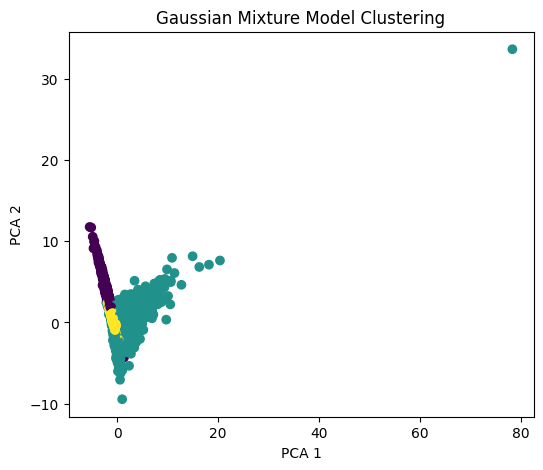

In [36]:
# GMM Visualization
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [37]:
# Probability Vectors
probs[:5]

"""Explanation: -

Each row has the probability of belonging to every component

Example like: [0.6, 0.3, 0.1]"""

'Explanation: -\n\nEach row has the probability of belonging to every component\n\nExample like: [0.6, 0.3, 0.1]'

Comparison of FCM vs GMM
Fuzzy C-Means:-
•	Is distance-based
•	Does need fuzziness parameter m
•	Also is sensitive to noise
Gaussian Mixture Models:-
•	Probabilistic
•	Uses EM algorithm
•	Handles overlapping clusters better

In [38]:
# AIC & BIC for Model Selection
# AIC & BIC Calculation
aic = []
bic = []
components = range(1, 7)

for k in components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca)
    aic.append(gmm.aic(X_pca))
    bic.append(gmm.bic(X_pca))

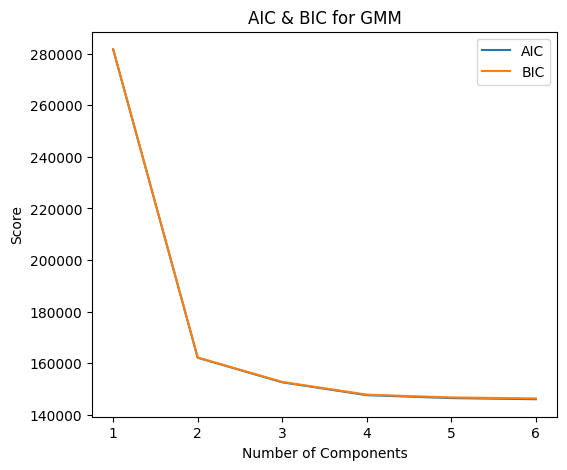

In [39]:
# Plot AIC & BIC
plt.figure(figsize=(6,5))
plt.plot(components, aic, label='AIC')
plt.plot(components, bic, label='BIC')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.legend()
plt.title("AIC & BIC for GMM")
plt.show()

•	Lower AIC/BIC = better model
•	BIC punishes complexity more
•	Optimal components are at the minimum curve point

Bayesian Gaussian Mixture Models

Explanation: -
•	Automatically determines number of components
•	Uses Dirichlet prior
•	Eliminates unnecessary clusters
Real-World Example: -
•	Customer segmentation where true number of segments is unknown


In [40]:
# Bayesian GMM Example
from sklearn.mixture import BayesianGaussianMixture

bgmm = BayesianGaussianMixture(n_components=10, random_state=42)
bgmm.fit(X_pca)

labels_bgmm = bgmm.predict(X_pca)

/usr/local/lib/python3.12/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


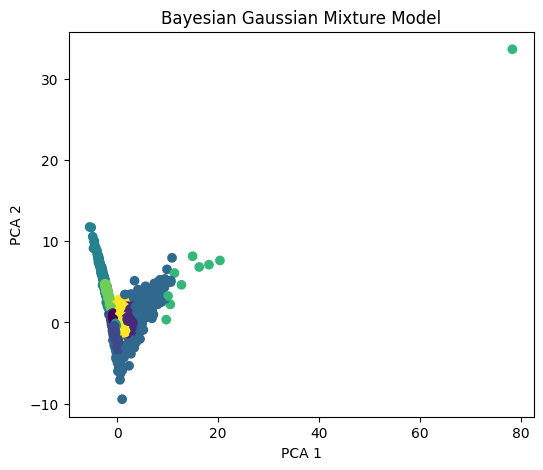

In [41]:
# Visualization
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_bgmm)
plt.title("Bayesian Gaussian Mixture Model")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()